## 业务场景

判断是否潜在合约客户 vs 单卡客户：


## 字段信息：
名称       | 说明   | 类型  |
--------------|---------|--------|-----
user_id     |用户标识 | int   |
service_kind  |业务类型 | string | 2G\3G\4G
call_duration|主叫时长（分）|
called_duration|被叫时长（分）
in_package_flux|免费流量
out_package_flux|计费流量
|月均上网时长（分）|
net_duration |入网时长（天） |long
last_recharge_value|最近一次缴费金额（元）
total_recharge_value|总缴费金额(元)|
total_recharge_count|缴费次数
contractuser_flag|是否潜在合约用户


silent_serv_flag|是否三无用户|int|0：否，1：是，三无：无月租费，无最低消费，无来电显示

pay_type    | 付费类型 |int   | 0：预付费，1：后付费



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 模拟生成运营商数据

In [2]:
from sklearn import datasets

In [6]:
data = pd.read_csv(r'data_carrier_svm.csv',encoding='utf8')
data.head()

,用户标识,业务类型,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,是否潜在合约用户
0,69152,3G,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0
1,68250,4G,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0
2,66830,4G,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,1
3,60790,3G,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,1
4,63040,3G,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,1


In [7]:
data['是否潜在合约用户'].value_counts()

1    5003
0    4997
Name: 是否潜在合约用户, dtype: int64

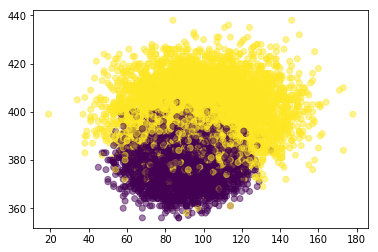

In [10]:
#生成数据可视化
y = data.loc[:,'是否潜在合约用户']
plt.scatter(data.loc[:,'主叫时长（分）'],data.loc[:,'免费流量'],c=y,alpha=0.5)

## 数据预处理

### 类别特征编码

In [12]:
data.head()

,用户标识,业务类型,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,是否潜在合约用户
0,69152,3G,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0
1,68250,4G,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0
2,66830,4G,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,1
3,60790,3G,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,1
4,63040,3G,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,1


In [13]:
X = data.loc[:,'业务类型':'余额']
y= data.loc[:,'是否潜在合约用户']
print('The shape of X is {0}'.format(X.shape))
print('The shape of y is {0}'.format(y.shape))

The shape of X is (10000, 11)
The shape of y is (10000,)


In [14]:
X.head()

,业务类型,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额
0,3G,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0
1,4G,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0
2,4G,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0
3,3G,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0
4,3G,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0


In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
def service_mapping(cell):
    if cell=='2G':
        return 2
    elif cell=='3G':
        return 3
    elif cell=='4G':
        return 4

#将业务类型的string型值映射为整数型
service_map = X['业务类型'].map(service_mapping)
service = pd.DataFrame(service_map)
# service_df
#使用OncHotEncoder转化类型特征为0/1编码的多维特征
enc = OneHotEncoder()
service_enc = enc.fit_transform(service).toarray()
service_enc

#0/1编码的多维特征的名称
service_names = enc.active_features_.tolist()
service_newname=[str(x)+'G' for x in service_names]

service_df = pd.DataFrame(service_enc,columns=service_newname)
service_df.head()
X_enc = pd.concat([X,service_df],axis = 1).drop('业务类型',axis=1)
X_enc.head()

,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,2G,3G,4G
0,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0.0,1.0,0.0
1,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0.0,0.0,1.0
2,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,0.0,0.0,1.0
3,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,0.0,1.0,0.0
4,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,0.0,1.0,0.0


### 数据归一化

In [220]:
# from sklearn.preprocessing import normalize
# X_normalized = normalize(X_enc)
# X_normalized[:2]

array([[0.1075175 , 0.14898853, 0.60670587, 0.01996753, 0.09830171,
        0.25804199, 0.09062189, 0.71422336, 0.01075175, 0.05529471,
        0.        , 0.        , 0.00153596],
       [0.13427845, 0.11285104, 0.52282887, 0.0499973 , 0.08428116,
        0.25998594, 0.09999459, 0.77424384, 0.01857042, 0.09428062,
        0.00142849, 0.        , 0.        ]])

In [38]:
from sklearn import metrics,cross_validation
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
#分割训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X_enc,y,test_size = 0.2, random_state=112)
print('The shape of X_train is {0}'.format(X_train.shape))
print('The shape of X_test is {0}'.format(X_test.shape))
print('The shape of y_train is {0}'.format(y_train.shape))
print('The shape of y_test is {0}'.format(y_test.shape))

The shape of X_train is (8000, 13)
The shape of X_test is (2000, 13)
The shape of y_train is (8000,)
The shape of y_test is (2000,)


In [29]:
type(X_train)
X_train

,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,2G,3G,4G
6475,104.0,103.0,382.0,0.0,70.0,198.0,96.0,606.0,8.0,74.0,0.0,1.0,0.0
2220,79.0,66.0,391.0,10.0,79.0,130.0,67.0,526.0,7.0,39.0,0.0,0.0,1.0
2462,104.0,106.0,371.0,14.0,114.0,210.0,47.0,479.0,11.0,53.0,0.0,1.0,0.0
4551,91.0,77.0,376.0,36.0,92.0,161.0,78.0,605.0,11.0,70.0,0.0,1.0,0.0
6736,72.0,132.0,406.0,92.0,150.0,179.0,106.0,556.0,11.0,33.0,0.0,1.0,0.0


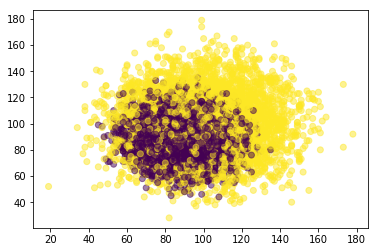

In [35]:
#生成数据可视化
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=y_train,alpha =0.5)

## Define a function for modeling and cross-validation

This function will do the following:
1. fit the model
2. determine training accuracy
3. determine training AUC
4. determine testing AUC
5. perform CV is performCV is True
6. plot Feature Importance if printFeatureImportance is True

In [81]:
def modelfit(alg, X_train,y_train, performCV=True, printFeatureImportance=True, cv_folds=5):
    #     dtest,
    #     Fit the algorithm on the data

    alg.fit(X_train, y_train)

    #Predict training set:
    train_predictions = alg.predict(X_train)
    train_predprob = alg.predict_proba(X_train)[:,1]

    #     test_predictions = alg.predict(X_test)
    #     test_predprob = alg.predict_proba(X_test)[:,1]
    #Perform cross-validation:
    #here the author calculate cross-validated AUC
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')

    #Print model report:
    print("\nModel Report")
    print("Accuracy (Train): %3.4f" %metrics.accuracy_score(y_train.values, train_predictions))
    ## IMPORTANT: first argument is true values, second argument is predicted probabilities
    print("AUC Score (Train): %f" %metrics.roc_auc_score(y_train,train_predprob))

    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g"\
        % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_,X_train.columns.tolist()).sort_values(ascending=True)
        feat_imp.plot(kind='barh', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

        #crete a horizontal bar graph
        # sort importances
    #         indices = np.argsort(alg.feature_importances_)
    #         # plot as bar chart
    #         plt.barh(np.arange(len(predictors)), alg.feature_importances_[indices])
    #         plt.yticks(np.arange(len(predictors)) + 0.25, np.array(predictors)[indices])
        _ = plt.xlabel('Relative importance')

### 训练简单模型 作为baseline model

In [77]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [47]:
#模型实例化
clf0 = GradientBoostingClassifier(random_state=110)
#在训练集上训练模型
linear_clf.fit(X_train,y_train)

#在测试集上预测
y_pred = linear_clf.predict(X_test)

#计算准备；率
score = metrics.accuracy_score(y_test,y_pred)
print('The accuracy score of the model is: {0}'.format(score))

#查看混淆举证
metrics.confusion_matrix(y_test,y_pred)

The accuracy score of the model is: 0.9855


array([[1033,    5],
       [  24,  938]], dtype=int64)


Model Report
Accuracy (Train): 0.9855
AUC Score (Train): 0.999095
CV Score : Mean - 0.9974389 | Std - 0.0005415776 | Min - 0.9965684 | Max - 0.9979514


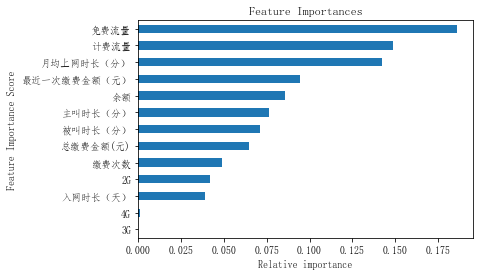

In [82]:
#模型实例化
clf0 = GradientBoostingClassifier(random_state=110)

modelfit(clf0,X_train,y_train)

### GBDT调参
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

### GBM Models:

There 2 types of parameters here:
1. Tree-specific parameters
  * min_samples_split
  * min_samples_leaf
  * max_depth
  * min_leaf_nodes
  * max_features
  * loss function
2. Boosting specific paramters
  * n_estimators
  * learning_rate
  * subsample


### Approach for tackling the problem

1. Decide a relatively higher value for learning rate and tune the number of estimators requried for that.
2. Tune the tree specific parameters for that learning rate
3. Tune subsample
4. Lower learning rate as much as possible computationally and increase the number of estimators accordingly.

In [83]:
len(X_train.columns.tolist())

13

### Step 1- Find the number of estimators for a high learning rate

We will use the following benchmarks for parameters:
1. min_samples_split = 100 : ~0.5-1% of total values. Since this is NOT an imbalanced class problem, we'll take big value
2. min_samples_leaf = 5 : Just using for preventing overfitting. will be tuned later.
3. max_depth = 8 : since we have 13 predictors, choose relatively high value
4. max_features = 'sqrt' : general thumbrule to start with
5. subsample = 0.8 : typically used value (will be tuned later)

0.1 is assumed to be a good learning rate to start with. Let's try to find the optimum number of estimators requried for this.

In [102]:
#设置迭代次数的范围
param_test1 = {'n_estimators':range(20,81,10)}
estimator = GradientBoostingClassifier(learning_rate=0.2, min_samples_split=50,
                                       min_samples_leaf=5,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10)
gsearch1 = GridSearchCV(estimator,param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': range(20, 81, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [103]:
# examine the best model
# print(gsearch1.grid_scores_)
print(gsearch1.best_score_)
print(gsearch1.best_params_)
print(gsearch1.best_estimator_)

0.9979665131122031
{'n_estimators': 70}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)


### Step 2- Tune tree-specific parameters
Now, lets move onto tuning the tree parameters. We will do this in 2 stages:
1. Tune max_depth and num_samples_split
2. Tune min_samples_leaf
3. Tune max_features

In [106]:
#Grid seach on subsample and max_features
param_test2 = {'max_depth':range(1,9,1), 'min_samples_split':range(10,101,10)}
estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=70,
                                       max_features='sqrt', subsample=0.8, random_state=10)
gsearch2 = GridSearchCV(estimator,param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(1, 9), 'min_samples_split': range(10, 101, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [109]:
print(gsearch2.best_score_)
print(gsearch2.best_params_)
print(gsearch2.best_estimator_)

0.9982828868720782
{'max_depth': 5, 'min_samples_split': 100}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=100,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)


In [111]:
#Grid seach on min_samples_split and min_samples_leaf
param_test3 = {'min_samples_split':range(90,201,20), 'min_samples_leaf':range(5,51,5)}

estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=70,max_depth=5,
                                       max_features='sqrt', subsample=0.8, random_state=10)
gsearch3 = GridSearchCV(estimator,param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'min_samples_split': range(90, 201, 20), 'min_samples_leaf': range(5, 51, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [112]:
print(gsearch3.best_score_)
print(gsearch3.best_params_)
print(gsearch3.best_estimator_)

0.9984212953891507
{'min_samples_leaf': 20, 'min_samples_split': 170}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=170,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)



Model Report
Accuracy (Train): 0.9972
AUC Score (Train): 0.999889
CV Score : Mean - 0.9984213 | Std - 0.0004348064 | Min - 0.9976295 | Max - 0.9988419


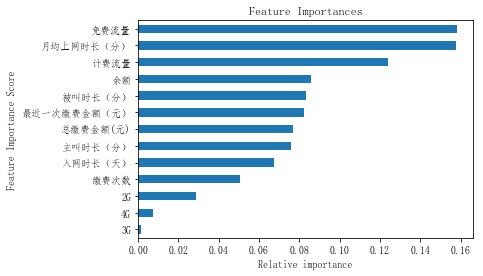

In [113]:
modelfit(gsearch3.best_estimator_, X_train, y_train)

In [115]:
#Grid seach on  max_features
param_test4 = {'max_features':range(1,8,1)}
estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=70,max_depth=5, 
                            min_samples_split=170, min_samples_leaf=20, subsample=0.8, random_state=10)
gsearch4 = GridSearchCV(estimator,param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=170,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_features': range(1, 8)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [117]:
print(gsearch4.best_score_)
print(gsearch4.best_params_)
print(gsearch4.best_estimator_)

0.9984212953891507
{'max_features': 3}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=170,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)


### Step3- Tune Subsample and Lower Learning Rate

In [118]:
#Grid seach on subsample and max_features
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}

estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=70,max_depth=5, 
                            min_samples_split=170, min_samples_leaf=20, max_features=3, random_state=10)


gsearch5 = GridSearchCV(estimator,param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=170,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [119]:
print(gsearch5.best_score_)
print(gsearch5.best_params_)
print(gsearch5.best_estimator_)

0.9984212953891507
{'subsample': 0.8}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=170,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)


### Reducing the learning rate
With all tuned lets try reducing the learning rate and proportionally increasing the number of estimators to get more robust results:


Model Report
Accuracy (Train): 0.9976
AUC Score (Train): 0.999897
CV Score : Mean - 0.9983287 | Std - 0.0003928892 | Min - 0.9977232 | Max - 0.9988045


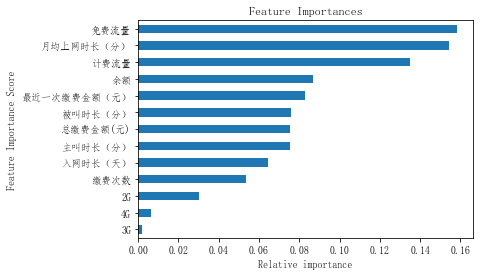

In [120]:
# learning_rate=0.1, n_estimators=140
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=5,min_samples_split=170, 
                                         min_samples_leaf=20, max_features=3, subsample=0.85,random_state=10)

modelfit(gbm_tuned_1, X_train,y_train)


Model Report
Accuracy (Train): 0.9978
AUC Score (Train): 0.999913
CV Score : Mean - 0.9983716 | Std - 0.0003831623 | Min - 0.9977154 | Max - 0.9987655


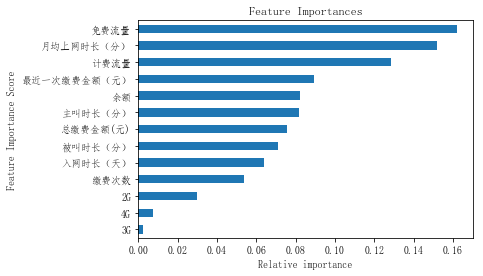

In [122]:
# learning_rate=0.05, n_estimators=210
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=280,max_depth=5,min_samples_split=170, 
                                         min_samples_leaf=20, max_features=3, subsample=0.85,random_state=10)

modelfit(gbm_tuned_2, X_train,y_train)


Model Report
Accuracy (Train): 0.9978
AUC Score (Train): 0.999916
CV Score : Mean - 0.998355 | Std - 0.0004214749 | Min - 0.9977185 | Max - 0.9988076


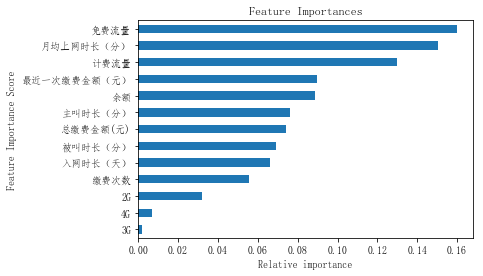

In [125]:
# learning_rate=0.01, n_estimators=1400
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1400,max_depth=5,min_samples_split=170, 
                                         min_samples_leaf=20, max_features=3, subsample=0.85,random_state=10)

modelfit(gbm_tuned_3, X_train,y_train)

## 使用最有超参再次进行训练

In [130]:
#模型实例化
# learning_rate=0.01, n_estimators=1400
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1400,max_depth=5,min_samples_split=170, 
                                         min_samples_leaf=20, max_features=3, subsample=0.85,random_state=10)

#在训练集上训练模型
gbm_tuned_3.fit(X_train,y_train)

#在测试集上预测
y_pred = gbm_tuned_3.predict(X_test)
                                         
y_pred_proba = gbm_tuned_3.predict_proba(X_test)[:,1]


The accuracy score of the model for test data is: 0.99
The accuracy score of the model for test data is: 0.9980061208384909


array([[1037,    1],
       [  19,  943]], dtype=int64)

### 模型评估

The accuracy score of the model for test data is: 0.99
The accuracy score of the model for test data is: 0.9980061208384909


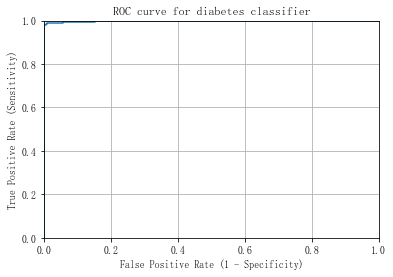

In [132]:
#计算准备；率
score = metrics.accuracy_score(y_test,y_pred)
print('The accuracy score of the model for test data is: {0}'.format(score))

auc_score = metrics.roc_auc_score(y_test,y_pred_proba)
print('The accuracy score of the model for test data is: {0}'.format(auc_score))

#查看混淆举证
metrics.confusion_matrix(y_test,y_pred)

# IMPORTANT: first argument is true values, second argument is predicted probabilities
#fpr: false positive rate (=1- specifity), tpr = true postive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)